In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
import joblib

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_columns', None)
plt.rcParams.update({'figure.max_open_warning': 0})
pd. set_option('use_inf_as_na',True) 

In [3]:
import pandas as pd
from google.colab import files
data_to_load = files.upload()

Saving train.csv to train.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['train.csv']))

In [6]:
import pandas as pd
from google.colab import files
data_to_load = files.upload()

Saving test.csv to test.csv


In [7]:
import io
df_test = pd.read_csv(io.BytesIO(data_to_load['test.csv']))

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [9]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
df.shape

(1168, 81)

In [11]:
df.isna().sum()[df.isna().sum() != 0]

LotFrontage      214
Alley           1091
MasVnrType         7
MasVnrArea         7
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
FireplaceQu      551
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1161
Fence            931
MiscFeature     1124
dtype: int64

In [12]:
# Find Missing Ratio of Dataset
df_null= (df.isnull().sum() / len(df)) * 100
df_null= df_null.drop(df_null[df_null == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :df_null})
missing_data

,Missing Ratio
PoolQC,99.400685
MiscFeature,96.232877
Alley,93.407534
Fence,79.708904
FireplaceQu,47.174658
LotFrontage,18.321918
GarageType,5.479452
GarageYrBlt,5.479452
GarageFinish,5.479452
GarageQual,5.479452


In [13]:
df.duplicated().sum()

0

In [14]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [15]:
df.isna().sum()[df.isna().sum() != 0]

LotFrontage      214
Alley           1091
MasVnrType         7
MasVnrArea         7
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
FireplaceQu      551
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1161
Fence            931
MiscFeature     1124
dtype: int64

In [18]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,Grvl,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,MnPrv,Othr,0,7,2007,WD,Normal
1,1018,120,RL,75.0,5814,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,MnPrv,Othr,0,8,2009,COD,Abnorml
2,929,20,RL,75.0,11838,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,MnPrv,Othr,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,Othr,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,MnPrv,Othr,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,Shed,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,TA,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,0,2,2008,WD,Normal
289,17,20,RL,50.0,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Ty

In [16]:
df.fillna(method='backfill',inplace=True)
df_test.fillna(method='backfill',inplace=True)

In [17]:
df.isna().sum()[df.isna().sum() != 0]

LotFrontage     1
Alley           1
PoolQC         47
Fence           1
MiscFeature    23
dtype: int64

*EDA*

In [19]:
dict(df.dtypes)

{'1stFlrSF': dtype('int64'),
 '2ndFlrSF': dtype('int64'),
 '3SsnPorch': dtype('int64'),
 'Alley': dtype('O'),
 'BedroomAbvGr': dtype('int64'),
 'BldgType': dtype('O'),
 'BsmtCond': dtype('O'),
 'BsmtExposure': dtype('O'),
 'BsmtFinSF1': dtype('int64'),
 'BsmtFinSF2': dtype('int64'),
 'BsmtFinType1': dtype('O'),
 'BsmtFinType2': dtype('O'),
 'BsmtFullBath': dtype('int64'),
 'BsmtHalfBath': dtype('int64'),
 'BsmtQual': dtype('O'),
 'BsmtUnfSF': dtype('int64'),
 'CentralAir': dtype('O'),
 'Condition1': dtype('O'),
 'Condition2': dtype('O'),
 'Electrical': dtype('O'),
 'EnclosedPorch': dtype('int64'),
 'ExterCond': dtype('O'),
 'ExterQual': dtype('O'),
 'Exterior1st': dtype('O'),
 'Exterior2nd': dtype('O'),
 'Fence': dtype('O'),
 'FireplaceQu': dtype('O'),
 'Fireplaces': dtype('int64'),
 'Foundation': dtype('O'),
 'FullBath': dtype('int64'),
 'Functional': dtype('O'),
 'GarageArea': dtype('int64'),
 'GarageCars': dtype('int64'),
 'GarageCond': dtype('O'),
 'GarageFinish': dtype('O'),
 'Gar

In [20]:
for column_data in df.dtypes.items():
    column, dtype = column_data
    if dtype == 'object':
        print(column)
        print(df[column].value_counts())
        print('-'*30)

MSZoning
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
------------------------------
Street
Pave    1164
Grvl       4
Name: Street, dtype: int64
------------------------------
Alley
Grvl    584
Pave    583
Name: Alley, dtype: int64
------------------------------
LotShape
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
------------------------------
LandContour
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
------------------------------
Utilities
AllPub    1168
Name: Utilities, dtype: int64
------------------------------
LotConfig
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64
------------------------------
LandSlope
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64
------------------------------
Neighborhood
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64


In [21]:
# Droping Utilities column because all have same value
df.drop('Utilities',axis=1,inplace=True)
df_test.drop('Utilities',axis=1,inplace=True)

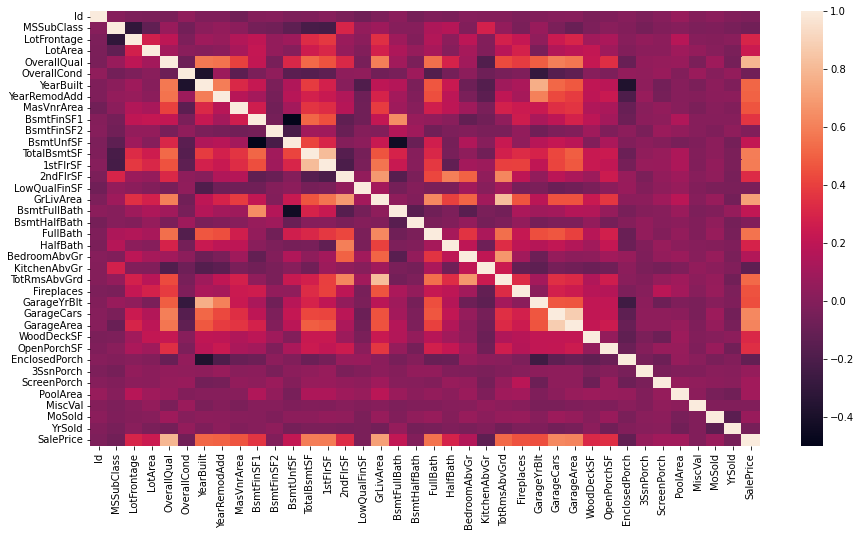

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr())

In [23]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1167.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,71.071123,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.080479,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.187500,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,25.001700,8957.442311,1.390153,1.124343,30.145255,20.785185,182.239859,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.879486,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.000000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.000000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1167 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          1167 non-null   object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

In [25]:
# Chaning Data type 
df['MSSubClass'] = df['MSSubClass'].astype('object')
df_test['MSSubClass'] = df_test['MSSubClass'].astype('object')

In [26]:
df.isna().sum().sum()

73

In [28]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,95.0,4928,Pave,Grvl,IR1,Lvl,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,Ex,MnPrv,Shed,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,Grvl,IR1,Lvl,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,Ex,MnPrv,Shed,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,Grvl,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,Ex,MnPrv,Shed,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,Grvl,IR1,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,Ex,MnPrv,Shed,0,1,2010,COD,Normal,190000
4,422,20,RL,58.0,16635,Pave,Grvl,IR1,Lvl,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,Ex,GdPrv,Shed,0,6,2009,WD,Normal,215000


In [29]:
# Top 15 Heatmap
corr = df.corr()
# cols = corrmat.nlargest(15, 'SalePrice')['SalePrice'].index
corr.nlargest(15,'SalePrice')['SalePrice'].index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'GarageYrBlt',
       'BsmtFinSF1'],
      dtype='object')

Drop Id column since it wont be that helpful on prediction

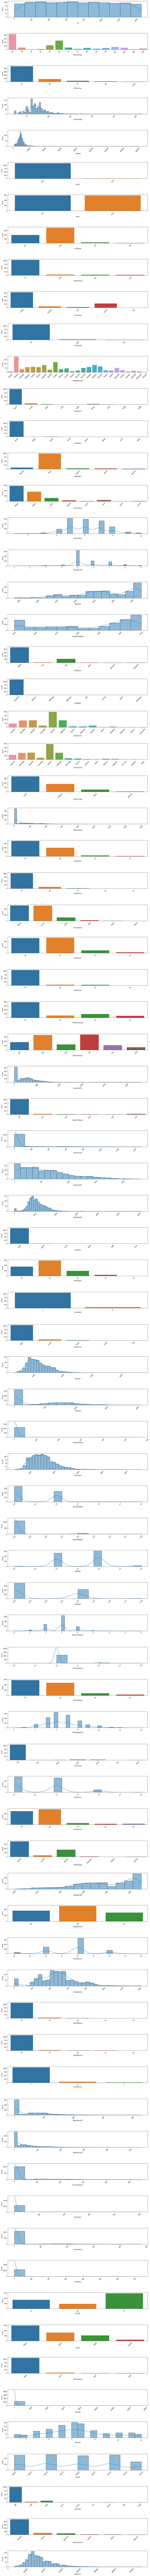

In [30]:
plt.figure(figsize=(17,400))
for i, column_data in enumerate(df.dtypes.items()):
    column,dtype = column_data
    plt.subplot(100,1,i+1)
    plt.subplots_adjust(hspace=1)

    if dtype == 'object':
        plt.xticks(rotation=45)
        sns.countplot(x=df[column])
    else:
        plt.xticks(rotation=45)
        sns.histplot(x=df[column],kde=True)


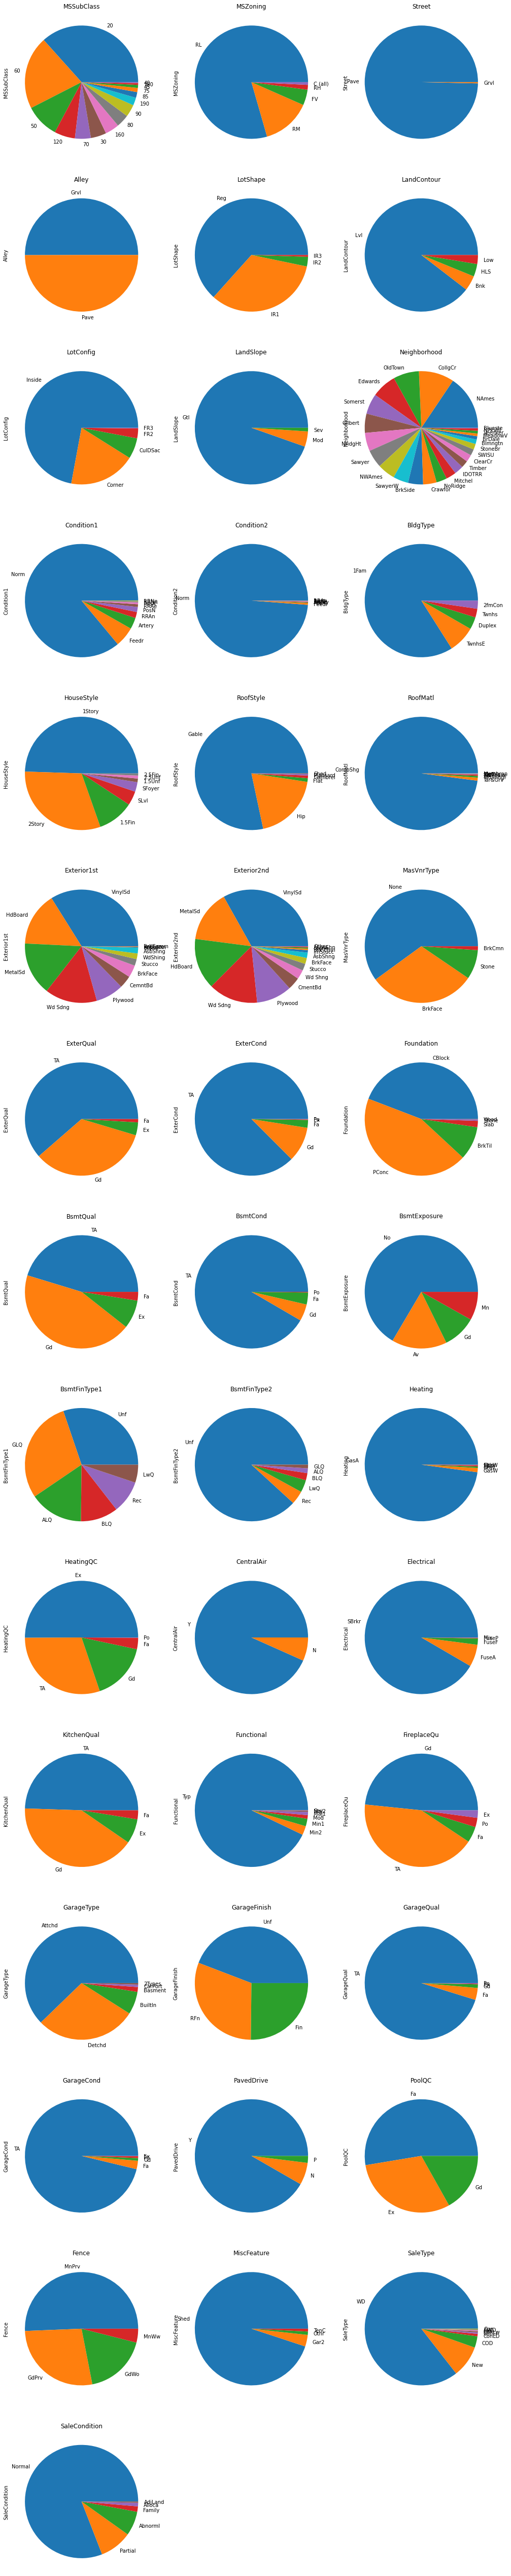

In [31]:
plt.figure(figsize=[17,500])
j = 0
for column_data in df.dtypes.items():
    column, dtype = column_data
    if dtype == 'object':
        j+=1
        plt.subplot(len(df.columns),3,j)
        plt.title(column)
        df[column].value_counts().plot(kind='pie')

In [32]:
# MSZoningvs SaleType
df.groupby(['MSZoning'])['SalePrice'].agg({'mean','median'})

,mean,median
MSZoning,,
C (all),75208.888889,81000.0
FV,209478.461538,202925.0
RH,131558.375000,136500.0
RL,191004.181034,174000.0
RM,129070.975460,124000.0


In [33]:
# LotAreavs SaleType
df.groupby(['LotArea'])['SalePrice'].agg({'mean','median'})

,mean,median
LotArea,,
1300,124000.0,124000.0
1477,80000.0,80000.0
1491,75500.0,75500.0
1533,94500.0,94500.0
1680,95400.0,90500.0
...,...,...
63887,160000.0,160000.0
70761,280000.0,280000.0
115149,302000.0,302000.0


In [34]:
# Streetvs SaleType
df.groupby(['Street'])['SalePrice'].agg({'mean','median'})

,mean,median
Street,,
Grvl,121110.750000,99750.0
Pave,181684.450172,164000.0


In [35]:
# LotShapevs SaleType
df.groupby(['LotShape'])['SalePrice'].agg({'mean','median'})

,mean,median
LotShape,,
IR1,206038.464103,188850.0
IR2,233827.750000,204000.0
IR3,226120.833333,237000.0
Reg,165906.660811,147000.0


In [36]:
# LandContourvs SaleType
df.groupby(['LandContour'])['SalePrice'].agg({'mean','median'})

,mean,median
LandContour,,
Bnk,146163.140000,139700.0
HLS,214302.166667,194500.0
Low,194393.333333,186250.0
Lvl,181476.572658,163995.0


In [37]:
# LotConfigvs SaleType
df.groupby(['LotConfig'])['SalePrice'].agg({'mean','median'})

,mean,median
LotConfig,,
Corner,182427.635135,161000.0
CulDSac,224594.463768,211000.0
FR2,171138.636364,160000.0
FR3,221500.000000,221500.0
Inside,178003.105701,160000.0


In [38]:
# LandSlopevs SaleType
df.groupby(['LandSlope'])['SalePrice'].agg({'mean','median'})

,mean,median
LandSlope,,
Gtl,181203.795475,163000.0
Mod,185353.313725,170000.0
Sev,190160.833333,182500.0


In [39]:
# Neighborhoodvs SaleType
df.groupby(['Neighborhood'])['SalePrice'].agg({'mean','median'})

,mean,median
Neighborhood,,
Blmngtn,195987.000000,191000.0
Blueste,137500.000000,137500.0
BrDale,104081.818182,106000.0
BrkSide,122836.000000,120500.0
ClearCr,216120.833333,205500.0
CollgCr,199517.508475,199450.0
Crawfor,208474.688889,200624.0
Edwards,128544.216867,126000.0
Gilbert,194790.093750,182167.0


In [40]:
# BldgTypevs SaleType
df.groupby(['BldgType'])['SalePrice'].agg({'mean','median'})

,mean,median
BldgType,,
1Fam,185602.300714,167900.0
2fmCon,133737.037037,131500.0
Duplex,133871.609756,136500.0
Twnhs,139437.931034,147400.0
TwnhsE,186066.111111,173866.5


In [41]:
# MSSubClassvs SaleType
df.groupby(['MSSubClass','SaleType']).size().sort_values(0,ascending=False).reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  


,MSSubClass,SaleType,0
0,20,WD,347
1,60,WD,202
2,50,WD,106
3,20,New,53
4,120,WD,52
5,70,WD,50
6,30,WD,48
7,160,WD,43
8,80,WD,41
9,60,New,38


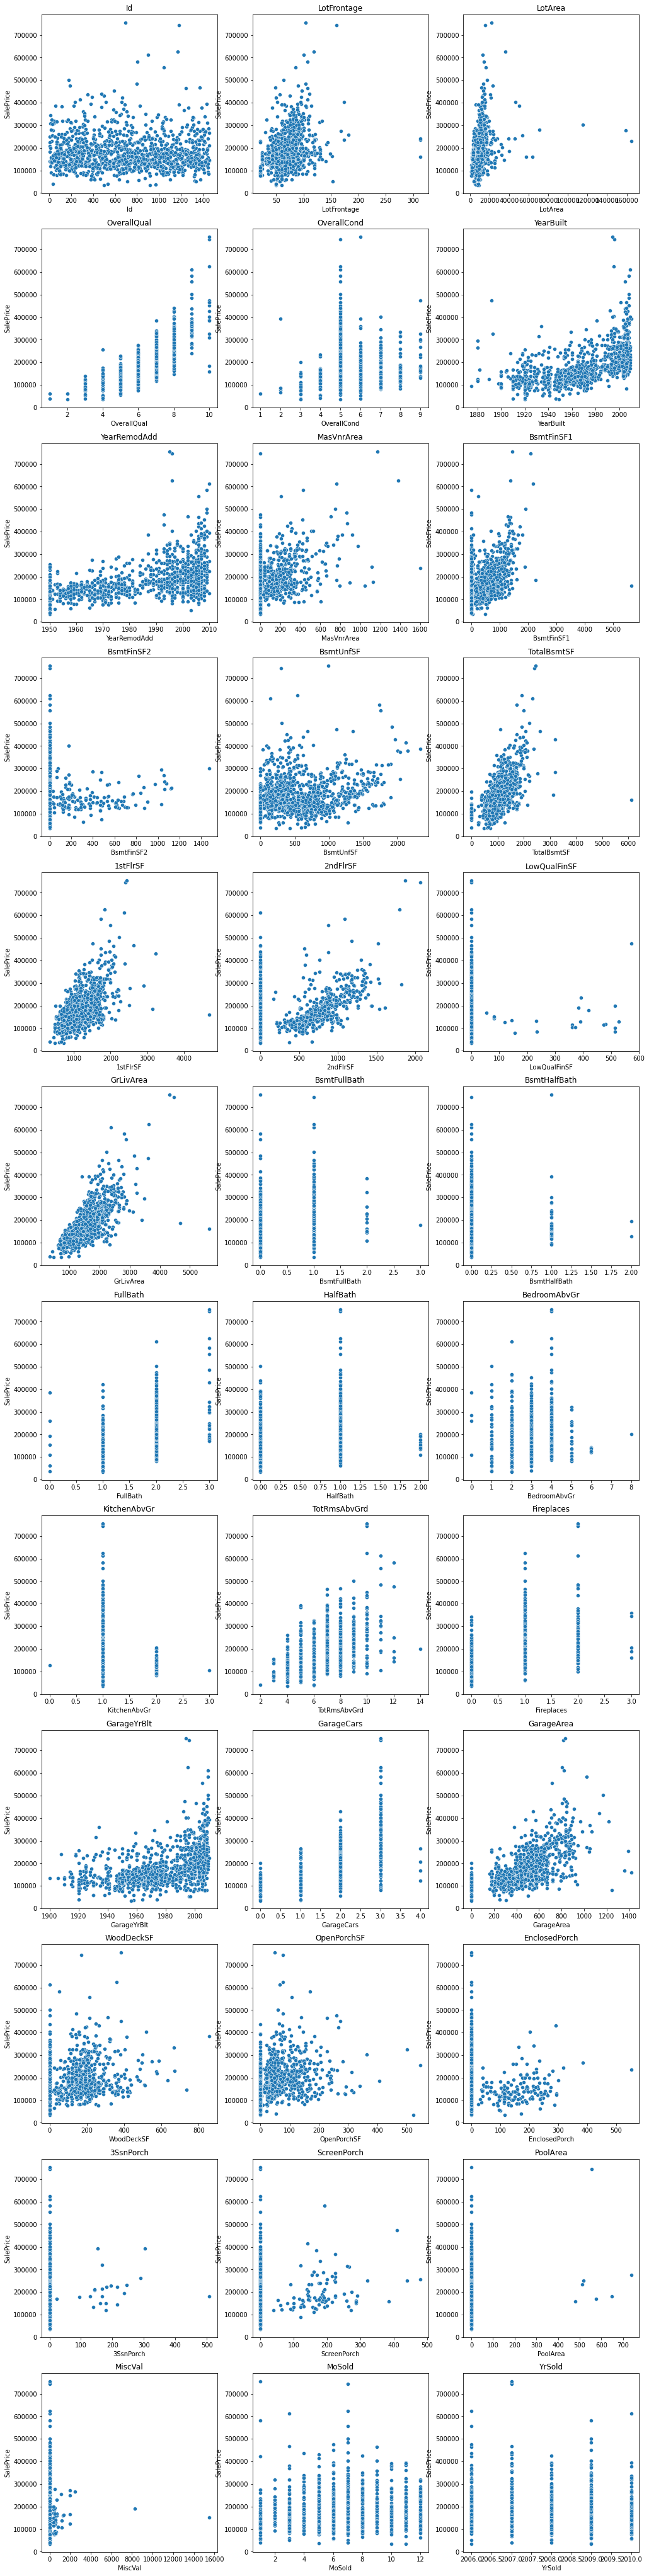

In [42]:
plt.figure(figsize=[17,500])
j = 0
for column_data in df.drop('SalePrice',axis=1).dtypes.items():
    column, dtype = column_data
    if dtype != 'object':
        j+=1
        plt.subplot(len(df.columns),3,j)
        plt.title(column)
        sns.scatterplot(data=df,x=column,y='SalePrice')

In [43]:
# LabelEncoder
labelEncoder = LabelEncoder()
for column_data in df.dtypes.items():
    column, dtype = column_data
    if dtype == 'object':
        df[[column]] = df[[column]].apply(labelEncoder.fit_transform)
        
        
# LabelEncoder
labelEncoder = LabelEncoder()
for column_data in df_test.dtypes.items():
    column, dtype = column_data
    if dtype == 'object':
        df_test[[column]] = df_test[[column]].apply(labelEncoder.fit_transform)

In [44]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,11,3,95.0,4928,1,0,0,3,4,0,13,2,2,4,2,6,5,1976,1976,1,1,8,9,2,0.0,3,4,1,2,3,3,0,120,5,0,958,1078,1,4,1,4,958,0,0,958,0,0,2,0,2,1,3,5,6,1,4,1,1977.0,1,2,440,4,4,2,0,205,0,0,0,0,0,2,2,0,2,2007,8,4,128000
1,889,0,3,95.0,15865,1,0,0,3,4,1,12,2,2,0,2,8,6,1970,1970,0,5,12,13,2,0.0,2,2,2,3,1,1,0,351,4,823,1043,2217,1,0,1,4,2217,0,0,2217,1,0,2,0,4,1,2,8,6,1,4,1,1970.0,2,2,621,4,4,2,81,207,0,0,224,0,0,2,2,0,10,2007,8,4,268000
2,793,5,3,92.0,9920,1,0,0,3,1,0,15,2,2,0,5,7,5,1996,1997,1,1,7,7,2,0.0,2,4,2,2,3,0,2,862,5,0,255,1117,1,0,1,4,1127,886,0,2013,1,0,2,1,3,1,3,8,6,1,4,1,1997.0,2,2,455,4,4,2,180,130,0,0,0,0,0,2,2,0,6,2007,8,4,269790
3,110,0,3,105.0,11751,1,0,0,3,4,0,14,2,2,0,2,6,6,1977,1977,3,1,8,9,1,480.0,3,4,1,2,3,3,1,705,5,0,1139,1844,1,0,1,4,1844,0,0,1844,0,0,2,0,3,1,3,7,6,1,4,1,1977.0,1,2,546,4,4,2,0,122,0,0,0,0,0,2,2,0,1,2010,0,4,190000
4,422,0,3,58.0,16635,1,0,0,3,2,0,14,2,2,0,2,6,7,1977,2000,1,1,4,4,3,126.0,2,4,1,2,3,3,0,1246,5,0,356,1602,1,2,1,4,1602,0,0,1602,0,1,2,0,3,1,2,8,6,1,4,1,1977.0,0,2,529,4,4,2,240,0,0,0,0,0,0,0,2,0,6,2009,8,4,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,0,3,67.0,9819,1,1,0,3,4,0,19,2,2,0,2,5,5,1967,1967,1,1,7,7,1,31.0,3,2,1,3,3,3,1,450,5,0,432,882,1,4,1,4,900,0,0,900,0,0,1,0,3,1,3,5,6,0,4,5,1970.0,2,1,280,4,4,2,0,0,0,0,0,0,3,2,4,0,2,2010,8,4,122000
1164,554,0,3,67.0,8777,1,1,3,3,4,0,7,1,2,0,2,4,5,1949,2003,1,1,11,12,2,0.0,3,4,1,2,3,3,0,0,5,0,0,0,1,0,1,4,1126,0,0,1126,0,0,2,0,2,1,2,5,6,0,4,5,2002.0,0,2,520,4,4,0,0,96,0,0,0,0,3,2,4,0,5,2009,8,4,108000
1165,196,12,3,24.0,2280,1,1,3,3,2,0,13,2,2,3,5,6,6,1976,1976,1,1,8,2,2,0.0,3,4,1,2,3,3,0,566,5,0,289,855,1,4,1,4,855,601,0,1456,0,0,2,1,3,1,3,7,6,1,4,1,1976.0,2,2,440,4,4,2,87,0,0,0,0,0,3,2,4,0,7,2009,8,4,148500
1166,31,6,0,50.0,8500,1,1,3,3,4,0,9,1,2,0,5,4,4,1920,1950,2,1,3,3,2,0.0,3,1,0,3,3,3,5,0,5,0,649,649,1,4,0,4,649,668,0,1317,0,0,1,0,3,1,3,6,6,0,2,5,1920.0,2,1,250,4,1,0,0,54,172,0,0,0,3,2,4,0,7,2008,8,4,40000


In [45]:
def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
df['IsRemodelled'] = df.apply(checkForRemodel, axis=1)
df_test['IsRemodelled'] = df_test.apply(checkForRemodel, axis=1)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled
0,127,11,3,95.0,4928,1,0,0,3,4,0,13,2,2,4,2,6,5,1976,1976,1,1,8,9,2,0.0,3,4,1,2,3,3,0,120,5,0,958,1078,1,4,1,4,958,0,0,958,0,0,2,0,2,1,3,5,6,1,4,1,1977.0,1,2,440,4,4,2,0,205,0,0,0,0,0,2,2,0,2,2007,8,4,128000,0
1,889,0,3,95.0,15865,1,0,0,3,4,1,12,2,2,0,2,8,6,1970,1970,0,5,12,13,2,0.0,2,2,2,3,1,1,0,351,4,823,1043,2217,1,0,1,4,2217,0,0,2217,1,0,2,0,4,1,2,8,6,1,4,1,1970.0,2,2,621,4,4,2,81,207,0,0,224,0,0,2,2,0,10,2007,8,4,268000,0
2,793,5,3,92.0,9920,1,0,0,3,1,0,15,2,2,0,5,7,5,1996,1997,1,1,7,7,2,0.0,2,4,2,2,3,0,2,862,5,0,255,1117,1,0,1,4,1127,886,0,2013,1,0,2,1,3,1,3,8,6,1,4,1,1997.0,2,2,455,4,4,2,180,130,0,0,0,0,0,2,2,0,6,2007,8,4,269790,1
3,110,0,3,105.0,11751,1,0,0,3,4,0,14,2,2,0,2,6,6,1977,1977,3,1,8,9,1,480.0,3,4,1,2,3,3,1,705,5,0,1139,1844,1,0,1,4,1844,0,0,1844,0,0,2,0,3,1,3,7,6,1,4,1,1977.0,1,2,546,4,4,2,0,122,0,0,0,0,0,2,2,0,1,2010,0,4,190000,0
4,422,0,3,58.0,16635,1,0,0,3,2,0,14,2,2,0,2,6,7,1977,2000,1,1,4,4,3,126.0,2,4,1,2,3,3,0,1246,5,0,356,1602,1,2,1,4,1602,0,0,1602,0,1,2,0,3,1,2,8,6,1,4,1,1977.0,0,2,529,4,4,2,240,0,0,0,0,0,0,0,2,0,6,2009,8,4,215000,1


In [46]:
def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df['BuiltOrRemodelAge'] = df.apply(getBuiltOrRemodelAge, axis=1)
df_test['BuiltOrRemodelAge'] = df_test.apply(getBuiltOrRemodelAge, axis=1)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,127,11,3,95.0,4928,1,0,0,3,4,0,13,2,2,4,2,6,5,1976,1976,1,1,8,9,2,0.0,3,4,1,2,3,3,0,120,5,0,958,1078,1,4,1,4,958,0,0,958,0,0,2,0,2,1,3,5,6,1,4,1,1977.0,1,2,440,4,4,2,0,205,0,0,0,0,0,2,2,0,2,2007,8,4,128000,0,31.0
1,889,0,3,95.0,15865,1,0,0,3,4,1,12,2,2,0,2,8,6,1970,1970,0,5,12,13,2,0.0,2,2,2,3,1,1,0,351,4,823,1043,2217,1,0,1,4,2217,0,0,2217,1,0,2,0,4,1,2,8,6,1,4,1,1970.0,2,2,621,4,4,2,81,207,0,0,224,0,0,2,2,0,10,2007,8,4,268000,0,37.0
2,793,5,3,92.0,9920,1,0,0,3,1,0,15,2,2,0,5,7,5,1996,1997,1,1,7,7,2,0.0,2,4,2,2,3,0,2,862,5,0,255,1117,1,0,1,4,1127,886,0,2013,1,0,2,1,3,1,3,8,6,1,4,1,1997.0,2,2,455,4,4,2,180,130,0,0,0,0,0,2,2,0,6,2007,8,4,269790,1,10.0
3,110,0,3,105.0,11751,1,0,0,3,4,0,14,2,2,0,2,6,6,1977,1977,3,1,8,9,1,480.0,3,4,1,2,3,3,1,705,5,0,1139,1844,1,0,1,4,1844,0,0,1844,0,0,2,0,3,1,3,7,6,1,4,1,1977.0,1,2,546,4,4,2,0,122,0,0,0,0,0,2,2,0,1,2010,0,4,190000,0,33.0
4,422,0,3,58.0,16635,1,0,0,3,2,0,14,2,2,0,2,6,7,1977,2000,1,1,4,4,3,126.0,2,4,1,2,3,3,0,1246,5,0,356,1602,1,2,1,4,1602,0,0,1602,0,1,2,0,3,1,2,8,6,1,4,1,1977.0,0,2,529,4,4,2,240,0,0,0,0,0,0,0,2,0,6,2009,8,4,215000,1,9.0


In [47]:
def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 1
    else:   
        return 2
    
df['OldOrNewGarage'] = df['GarageYrBlt'].apply(getGarageConstructionPeriod)
df_test['OldOrNewGarage'] = df_test['GarageYrBlt'].apply(getGarageConstructionPeriod)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,127,11,3,95.0,4928,1,0,0,3,4,0,13,2,2,4,2,6,5,1976,1976,1,1,8,9,2,0.0,3,4,1,2,3,3,0,120,5,0,958,1078,1,4,1,4,958,0,0,958,0,0,2,0,2,1,3,5,6,1,4,1,1977.0,1,2,440,4,4,2,0,205,0,0,0,0,0,2,2,0,2,2007,8,4,128000,0,31.0,1
1,889,0,3,95.0,15865,1,0,0,3,4,1,12,2,2,0,2,8,6,1970,1970,0,5,12,13,2,0.0,2,2,2,3,1,1,0,351,4,823,1043,2217,1,0,1,4,2217,0,0,2217,1,0,2,0,4,1,2,8,6,1,4,1,1970.0,2,2,621,4,4,2,81,207,0,0,224,0,0,2,2,0,10,2007,8,4,268000,0,37.0,1
2,793,5,3,92.0,9920,1,0,0,3,1,0,15,2,2,0,5,7,5,1996,1997,1,1,7,7,2,0.0,2,4,2,2,3,0,2,862,5,0,255,1117,1,0,1,4,1127,886,0,2013,1,0,2,1,3,1,3,8,6,1,4,1,1997.0,2,2,455,4,4,2,180,130,0,0,0,0,0,2,2,0,6,2007,8,4,269790,1,10.0,1
3,110,0,3,105.0,11751,1,0,0,3,4,0,14,2,2,0,2,6,6,1977,1977,3,1,8,9,1,480.0,3,4,1,2,3,3,1,705,5,0,1139,1844,1,0,1,4,1844,0,0,1844,0,0,2,0,3,1,3,7,6,1,4,1,1977.0,1,2,546,4,4,2,0,122,0,0,0,0,0,2,2,0,1,2010,0,4,190000,0,33.0,1
4,422,0,3,58.0,16635,1,0,0,3,2,0,14,2,2,0,2,6,7,1977,2000,1,1,4,4,3,126.0,2,4,1,2,3,3,0,1246,5,0,356,1602,1,2,1,4,1602,0,0,1602,0,1,2,0,3,1,2,8,6,1,4,1,1977.0,0,2,529,4,4,2,240,0,0,0,0,0,0,0,2,0,6,2009,8,4,215000,1,9.0,1


In [48]:
df['TotalBsmtSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2']+df['BsmtUnfSF']
df['GrLivArea'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['LowQualFinSF']

df_test['TotalBsmtSF'] = df_test['BsmtFinSF1'] + df_test['BsmtFinSF2'] + df_test['BsmtUnfSF']
df_test['GrLivArea'] = df_test['1stFlrSF'] + df_test['2ndFlrSF'] + df_test['LowQualFinSF']

In [49]:
df.drop(columns = ['BsmtUnfSF','BsmtFinSF1', 'BsmtFinSF2','1stFlrSF','2ndFlrSF','LowQualFinSF'], axis=1, inplace = True)

In [50]:
df_test.drop(columns = ['BsmtUnfSF','BsmtFinSF1', 'BsmtFinSF2','1stFlrSF','2ndFlrSF','LowQualFinSF'], axis=1, inplace = True)

In [51]:
df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)
df_test.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [52]:
missing_count=df.isnull().sum()
missing_count[missing_count>0].sort_values(ascending=False)

LotFrontage    1
dtype: int64

In [53]:
for col in [ 'LotFrontage','TotalBsmtSF']:
    imp=SimpleImputer(missing_values=np.NaN,strategy="mean")
    df[col]=imp.fit_transform(df[col].values.reshape(-1,1))
    df_test[col]=imp.fit_transform(df_test[col].values.reshape(-1,1))

In [54]:
for col in [ 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish']:
    imp=SimpleImputer(missing_values=np.NaN,strategy="most_frequent")
    df[col]=imp.fit_transform(df[col].values.reshape(-1,1))
    df_test[col]=imp.fit_transform(df_test[col].values.reshape(-1,1))

In [55]:
df.drop(['Alley','MasVnrType','MasVnrArea','FireplaceQu','PoolQC','Fence','MiscFeature','MiscVal'], 
        axis = 1, 
        inplace = True
       )

df_test.drop(['Alley','MasVnrType','MasVnrArea','FireplaceQu','PoolQC','Fence','MiscFeature','MiscVal'], 
        axis = 1, 
        inplace = True
       )

In [56]:
df['GarageQual'] = df['GarageQual'].replace(np.nan, 'No Garage')
df['GarageCond'] = df['GarageCond'].replace(np.nan, 'No Garage')

df_test['GarageQual'] = df_test['GarageQual'].replace(np.nan, 'No Garage')
df_test['GarageCond'] = df_test['GarageCond'].replace(np.nan, 'No Garage')

In [57]:
df.isnull().sum().sum()

0

In [58]:
df_test.isnull().sum().sum()

0

In [59]:
df = df.reset_index()
df_test = df_test.reset_index()

In [60]:
# SPlit
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [61]:
df.head()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleType,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,0,127,11,3,95.0,4928,1,0,3,4,0,13,2,2,4,2,6,5,1,1,8,9,3,4,1,2,3,3,0,5,1078.0,1,4,1,4,958,0,0,2,0,2,1,3,5,6,1,1,1,2,440,4,4,2,0,205,0,0,0,0,2,8,4,128000,0,31.0,1
1,1,889,0,3,95.0,15865,1,0,3,4,1,12,2,2,0,2,8,6,0,5,12,13,2,2,2,3,1,1,0,4,2217.0,1,0,1,4,2217,1,0,2,0,4,1,2,8,6,1,1,2,2,621,4,4,2,81,207,0,0,224,0,10,8,4,268000,0,37.0,1
2,2,793,5,3,92.0,9920,1,0,3,1,0,15,2,2,0,5,7,5,1,1,7,7,2,4,2,2,3,0,2,5,1117.0,1,0,1,4,2013,1,0,2,1,3,1,3,8,6,1,1,2,2,455,4,4,2,180,130,0,0,0,0,6,8,4,269790,1,10.0,1
3,3,110,0,3,105.0,11751,1,0,3,4,0,14,2,2,0,2,6,6,3,1,8,9,3,4,1,2,3,3,1,5,1844.0,1,0,1,4,1844,0,0,2,0,3,1,3,7,6,1,1,1,2,546,4,4,2,0,122,0,0,0,0,1,0,4,190000,0,33.0,1
4,4,422,0,3,58.0,16635,1,0,3,2,0,14,2,2,0,2,6,7,1,1,4,4,2,4,1,2,3,3,0,5,1602.0,1,2,1,4,1602,0,1,2,0,3,1,2,8,6,1,1,0,2,529,4,4,2,240,0,0,0,0,0,6,8,4,215000,1,9.0,1


In [62]:
X_transfomred = MinMaxScaler().fit_transform(X)
X = pd.DataFrame(X_transfomred,columns=X.columns)
X.head()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleType,SaleCondition,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,0.000000,0.086361,0.785714,0.75,0.253425,0.022209,1.0,0.0,1.0,1.00,0.0,0.541667,0.25,0.285714,1.0,0.285714,0.555556,0.500,0.2,0.142857,0.615385,0.642857,1.000000,1.0,0.2,0.666667,1.000000,1.000000,0.0,1.0,0.176432,0.2,1.0,1.0,1.0,0.117558,0.000000,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.250000,1.0,0.333333,0.2,0.5,0.5,0.310296,1.0,1.0,1.0,0.000000,0.374771,0.0,0.0,0.000000,0.0,0.090909,1.0,0.8,0.0,0.524590,0.0
1,0.000857,0.608636,0.000000,0.75,0.253425,0.089159,1.0,0.0,1.0,1.00,0.5,0.500000,0.25,0.285714,0.0,0.285714,0.777778,0.625,0.0,0.714286,0.923077,0.928571,0.666667,0.5,0.4,1.000000,0.333333,0.333333,0.0,0.8,0.362848,0.2,0.0,1.0,1.0,0.354748,0.333333,0.0,0.666667,0.0,0.500,0.333333,0.666667,0.500000,1.0,0.333333,0.2,1.0,0.5,0.437941,1.0,1.0,1.0,0.094516,0.378428,0.0,0.0,0.466667,0.0,0.818182,1.0,0.8,0.0,0.622951,0.0
2,0.001714,0.542838,0.357143,0.75,0.243151,0.052767,1.0,0.0,1.0,0.25,0.0,0.625000,0.25,0.285714,0.0,0.714286,0.666667,0.500,0.2,0.142857,0.538462,0.500000,0.666667,1.0,0.4,0.666667,1.000000,0.000000,0.4,1.0,0.182815,0.2,0.0,1.0,1.0,0.316315,0.333333,0.0,0.666667,0.5,0.375,0.333333,1.000000,0.500000,1.0,0.333333,0.2,1.0,0.5,0.320874,1.0,1.0,1.0,0.210035,0.237660,0.0,0.0,0.000000,0.0,0.454545,1.0,0.8,1.0,0.180328,0.0
3,0.002571,0.074709,0.000000,0.75,0.287671,0.063975,1.0,0.0,1.0,1.00,0.0,0.583333,0.25,0.285714,0.0,0.285714,0.555556,0.625,0.6,0.142857,0.615385,0.642857,1.000000,1.0,0.2,0.666667,1.000000,1.000000,0.2,1.0,0.301800,0.2,0.0,1.0,1.0,0.284476,0.000000,0.0,0.666667,0.0,0.375,0.333333,1.000000,0.416667,1.0,0.333333,0.2,0.5,0.5,0.385049,1.0,1.0,1.0,0.000000,0.223035,0.0,0.0,0.000000,0.0,0.000000,0.0,0.8,0.0,0.557377,0.0
4,0.003428,0.288554,0.000000,0.75,0.126712,0.093872,1.0,0.0,1.0,0.50,0.0,0.583333,0.25,0.285714,0.0,0.285714,0.555556,0.750,0.2,0.142857,0.307692,0.285714,0.666667,1.0,0.2,0.666667,1.000000,1.000000,0.0,1.0,0.262193,0.2,0.5,1.0,1.0,0.238885,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.666667,0.500000,1.0,0.333333,0.2,0.0,0.5,0.373061,1.0,1.0,1.0,0.280047,0.000000,0.0,0.0,0.000000,0.0,0.454545,1.0,0.8,1.0,0.163934,0.0


In [63]:
df_test_t = MinMaxScaler().fit_transform(df_test)
df_test = pd.DataFrame(df_test_t,columns=df_test.columns)
df_test.head()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleType,SaleCondition,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,0.000000,0.228276,0.000000,0.666667,0.503876,0.059101,1.0,0.0,0.333333,0.00,0.0,0.913043,0.285714,0.0,0.0,0.285714,0.857143,0.333333,0.75,0.0,0.818182,0.846154,0.666667,1.0,0.4,0.000000,1.0,0.333333,0.4,1.0,0.621202,0.0,0.000000,1.0,1.0,0.478989,0.5,0.0,0.666667,0.0,0.500000,0.0,0.666667,0.555556,1.0,0.5,0.2,0.0,0.75,0.642586,1.0,1.0,1.0,0.244505,0.122010,0.0,0.0,0.0,0.0,0.545455,1.0,0.666667,1.0,0.016667,1.0
1,0.003436,0.697931,0.785714,0.666667,0.418605,0.020064,1.0,0.0,1.000000,0.25,0.0,0.913043,0.285714,0.0,1.0,0.285714,0.714286,0.333333,0.25,0.0,0.454545,0.384615,0.666667,1.0,0.2,0.666667,1.0,0.000000,0.4,1.0,0.394312,0.0,0.666667,1.0,1.0,0.286983,0.5,0.0,0.333333,0.0,0.166667,0.0,0.666667,0.111111,1.0,0.5,0.2,0.5,0.50,0.537072,1.0,1.0,1.0,0.086538,0.000000,0.0,0.0,0.0,0.0,0.636364,0.0,0.000000,0.0,0.416667,0.0
2,0.006873,0.636552,0.000000,0.666667,0.418605,0.048250,1.0,1.0,1.000000,1.00,0.0,0.173913,0.285714,0.0,0.0,0.285714,0.714286,0.333333,0.75,0.0,0.818182,0.846154,0.666667,1.0,0.4,0.666667,1.0,0.000000,1.0,1.0,0.566580,0.0,0.000000,1.0,1.0,0.433208,0.0,0.0,0.666667,0.0,0.500000,0.0,0.000000,0.444444,1.0,0.5,0.2,0.5,0.50,0.496198,1.0,1.0,1.0,0.277473,0.361244,0.0,0.0,0.0,0.0,0.454545,1.0,0.666667,0.0,0.133333,1.0
3,0.010309,0.787586,0.428571,0.666667,0.418605,0.049008,1.0,1.0,0.000000,1.00,0.0,0.217391,0.285714,0.0,0.0,0.714286,0.571429,0.666667,0.25,0.0,0.545455,0.538462,1.000000,1.0,0.2,1.000000,1.0,1.000000,0.8,1.0,0.227537,0.0,0.000000,1.0,1.0,0.356679,0.0,0.0,0.333333,0.5,0.500000,0.0,0.333333,0.444444,1.0,0.5,0.2,1.0,0.25,0.222433,1.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.545455,1.0,0.666667,1.0,0.983333,0.0
4,0.013746,0.842069,0.357143,0.666667,0.503876,0.061164,1.0,0.0,1.000000,0.25,0.0,0.869565,0.142857,0.0,0.0,0.714286,0.428571,0.333333,0.25,0.0,0.818182,0.846154,0.666667,1.0,0.4,0.666667,1.0,0.666667,1.0,1.0,0.288946,0.0,0.000000,1.0,1.0,0.482747,0.0,0.0,0.666667,0.5,0.666667,0.0,0.666667,0.666667,1.0,0.5,0.6,0.0,0.75,0.634981,1.0,1.0,1.0,0.137363,0.043062,0.0,0.0,0.0,0.0,0.000000,1.0,0.666667,0.0,0.016667,1.0


In [64]:
cols = ['LotFrontage','LotArea','TotalBsmtSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','SalePrice'] # one or more

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [65]:
X_transfomred = PowerTransformer(standardize=False).fit_transform(X)
X = pd.DataFrame(X_transfomred,columns=X.columns)
X.head()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleType,SaleCondition,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,0.000000,0.085176,0.423489,2.058504,0.171910,0.019097,1.546661e+124,0.0,50553.101556,6.227756,-0.000000,0.498993,0.182408,0.19445,0.090588,0.251749,0.491436,0.373938,0.115411,0.066049,1.154833,1.215123,12.818511,968659.849116,0.200768,1.625987,353782.543683,5.419444,0.000000,3.483435e+06,0.140726,0.096208,0.471043,147479.019936,24702.737728,0.093262,-0.000000,-0.000000,0.597409,-0.000000,0.236091,0.152926,4.306417,0.198973,6.327426e+09,0.233717,0.13578,0.574766,0.605223,0.295690,1.032918e+13,3.602929e+18,55332.500136,-0.000000,0.116180,-0.0,-0.0,-0.000000,-0.0,0.088623,123224.728175,6.236058,-0.000000,0.333760,-0.0
1,0.000857,0.559877,-0.000000,2.058504,0.171910,0.051478,1.546661e+124,0.0,50553.101556,6.227756,0.024826,0.463133,0.182408,0.19445,-0.000000,0.251749,0.661346,0.440776,-0.000000,0.082173,2.270121,2.236920,3.905932,841.600533,0.402911,3.579247,32.085070,0.613701,0.000000,2.144717e+05,0.236866,0.096208,-0.000000,147479.019936,24702.737728,0.192870,0.174897,-0.000000,0.597409,-0.000000,0.449572,0.152926,1.846681,0.330328,6.327426e+09,0.233717,0.13578,1.286152,0.605223,0.410134,1.032918e+13,3.602929e+18,55332.500136,0.071390,0.116391,-0.0,-0.0,0.026128,-0.0,0.679725,123224.728175,6.236058,-0.000000,0.370797,-0.0
2,0.001713,0.503234,0.257629,2.058504,0.167223,0.037453,1.546661e+124,0.0,50553.101556,0.410821,-0.000000,0.569690,0.182408,0.19445,-0.000000,0.540997,0.577884,0.373938,0.115411,0.066049,0.940335,0.829852,3.905932,968659.849116,0.402911,1.625987,353782.543683,0.000000,0.380519,3.483435e+06,0.144736,0.096208,-0.000000,147479.019936,24702.737728,0.181640,0.174897,-0.000000,0.597409,0.211768,0.345257,0.152926,4.306417,0.330328,6.327426e+09,0.233717,0.13578,1.286152,0.605223,0.305316,1.032918e+13,3.602929e+18,55332.500136,0.118775,0.102982,-0.0,-0.0,-0.000000,-0.0,0.405836,123224.728175,6.236058,0.645588,0.150869,-0.0
3,0.002570,0.073818,-0.000000,2.058504,0.186595,0.042507,1.546661e+124,0.0,50553.101556,6.227756,-0.000000,0.534508,0.182408,0.19445,-0.000000,0.251749,0.491436,0.440776,0.168923,0.066049,1.154833,1.215123,12.818511,968659.849116,0.200768,1.625987,353782.543683,5.419444,0.194772,3.483435e+06,0.209614,0.096208,-0.000000,147479.019936,24702.737728,0.171221,-0.000000,-0.000000,0.597409,-0.000000,0.345257,0.152926,4.306417,0.291815,6.327426e+09,0.233717,0.13578,0.574766,0.605223,0.363155,1.032918e+13,3.602929e+18,55332.500136,-0.000000,0.100677,-0.0,-0.0,-0.000000,-0.0,0.000000,0.000000,6.236058,-0.000000,0.346666,-0.0
4,0.003426,0.276340,-0.000000,2.058504,0.102932,0.052855,1.546661e+124,0.0,50553.101556,1.321804,-0.000000,0.534508,0.182408,0.19445,-0.000000,0.251749,0.491436,0.500756,0.115411,0.066049,0.428165,0.385529,3.905932,968659.849116,0.200768,1.625987,353782.543683,5.419444,0.000000,3.483435e+06,0.189919,0.096208,0.321238,147479.019936,24702.737728,0.154243,-0.000000,0.022363,0.597409,-0.000000,0.345257,0.152926,1.846681,0.330328,6.327426e+09,0.233717,0.13578,0.000000,0.605223,0.352421,1.032918e+13,3.602929e+18,55332.500136,0.135996,-0.000000,-0.0,-0.0,-0.000000,-0.0,0.405836,123224.728175,6.236058,0.645588,0.139229,-0.0


In [66]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,random_state=42,test_size=0.36)

In [68]:
def build_model(model):
    
    name = str(model)
        
    print('----------------------------------')
    print('*****',name,'******')
    print('----------------------------------')
    
   
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    mean_absolute_error_ = mean_absolute_error(y_test,y_pred)
    mean_squared_error_ = mean_squared_error(y_test,y_pred)
    r2_score_ = r2_score(y_test,y_pred)
    
    kFold = KFold(n_splits=3,shuffle=True,random_state=42)
    scores = cross_val_score(model,X,y,cv=kFold,scoring='r2',n_jobs=-1)
    
    mean_cv_scores = np.mean(scores)
    std_cv_scores = np.std(scores)
    
    diff_acc_score_cv_score = np.abs(r2_score_ - mean_cv_scores)
    
    print('mean_absolute_error: ',mean_absolute_error_)
    print('mean_squared_error: ',mean_squared_error_)
    print('r2_score: ',r2_score_)
    
    print('Cross Val Score: ',mean_cv_scores)
    print('Cross Val std: ',std_cv_scores)
    print('Diff Between score and CV score: ', diff_acc_score_cv_score)
    print('__________________________________________\n'*2)
    plt.figure(figsize=(5,5))
    plt.scatter(x=y_test,y=y_pred)
    plt.show()
    
    return (name, r2_score, mean_cv_scores, std_cv_scores, diff_acc_score_cv_score, model)

In [69]:
models = [
    LinearRegression(normalize=True),
    Ridge(normalize=True),
    SVR(),
    ElasticNet(normalize=True)
]

----------------------------------
***** LinearRegression(normalize=True) ******
----------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


mean_absolute_error:  23046.280564816992
mean_squared_error:  1424969721.0496764
r2_score:  0.7731048593107503
Cross Val Score:  0.7878051767353685
Cross Val std:  0.021584316125989263
Diff Between score and CV score:  0.014700317424618192
__________________________________________
__________________________________________



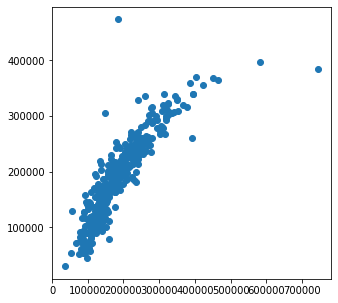

----------------------------------
***** Ridge(normalize=True) ******
----------------------------------
mean_absolute_error:  22368.08718778166
mean_squared_error:  1442008880.2819862
r2_score:  0.7703917473237858
Cross Val Score:  0.7806076925909368
Cross Val std:  0.01773813644239716
Diff Between score and CV score:  0.010215945267150972
__________________________________________
__________________________________________



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


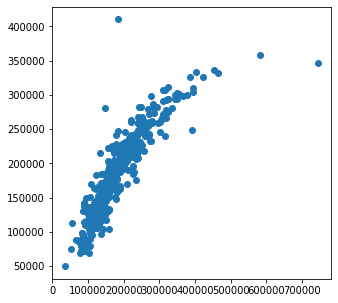

----------------------------------
***** SVR() ******
----------------------------------
mean_absolute_error:  56719.10646422282
mean_squared_error:  6544104259.275851
r2_score:  -0.04200491747975077
Cross Val Score:  -0.0539923243972947
Cross Val std:  0.019698916939694427
Diff Between score and CV score:  0.011987406917543929
__________________________________________
__________________________________________



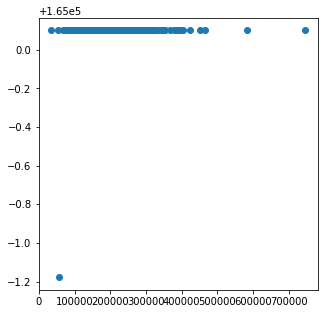

----------------------------------
***** ElasticNet(normalize=True) ******
----------------------------------
mean_absolute_error:  57550.6508642313
mean_squared_error:  6061324875.775073
r2_score:  0.034867099183583994
Cross Val Score:  0.03118129974536521
Cross Val std:  0.0017526381350687272
Diff Between score and CV score:  0.003685799438218784
__________________________________________
__________________________________________



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,


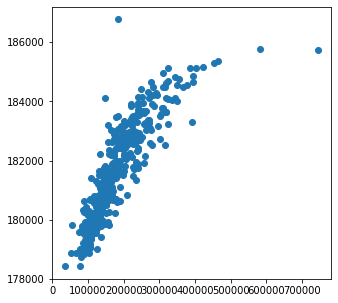

In [70]:
final_model_list = []
for one_model in models:
    
    name, accuracy_score, mean_cv_scores, std_cv_scores, diff_acc_score_cv_score, model = build_model(one_model)
    final_model_list.append({
        'name': name,
        'accuracy_score': accuracy_score,
        'mean_cv_scores': mean_cv_scores,
        'std_cv_scores': std_cv_scores,
        'diff_acc_score_cv_score': diff_acc_score_cv_score,
        'model': model,

    })

*** Best model is Linear Regresion***

In [71]:
param_grid={ 
    'fit_intercept':[True,False], 
    'normalize':[True,False], 
    'copy_X':[True,False], 
    'n_jobs':[None,1,-1], 
    'positive':[True,False]
}
gridSearchCV = GridSearchCV(LinearRegression(),param_grid=param_grid,cv=3)
gridSearchCV.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [None, 1, -1], 'normalize': [True, False],
                         'positive': [True, False]})

In [72]:
y_pred = gridSearchCV.best_estimator_.predict(X_test)

In [73]:
print('r2 score:',r2_score(y_test,y_pred))

r2 score: 0.753794584423065


In [74]:
# Saving model
joblib.dump(gridSearchCV.best_estimator_,'Liner Regrssion.obj')

['Liner Regrssion.obj']

In [79]:
# Predicted test result
pd.DataFrame(gridSearchCV.best_estimator_.predict(df_test),columns=['Predicted Price',])

,Predicted Price
0,525623.242896
1,80916.817054
2,384399.810190
3,49333.689410
4,173836.854807
...,...
287,197869.988097
288,429028.474764
289,-18464.111518
290,63065.209628
